In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("marks_data.xlsx")

In [3]:
df.head()

,STD_ID,Math,Science
0,1,52,82
1,2,53,86
2,3,75,88
3,4,75,76
4,5,59,92


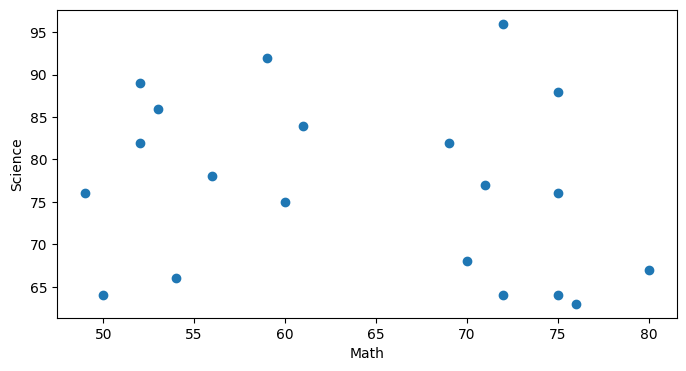

In [4]:
plt.figure(figsize=(8, 4))
plt.scatter(df["Math"], df["Science"])
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [5]:
k = 2
c1 = np.random.randint(40, 99, 2)
c2 = np.random.randint(40, 99, 2)
c1, c2

(array([71, 62]), array([88, 66]))

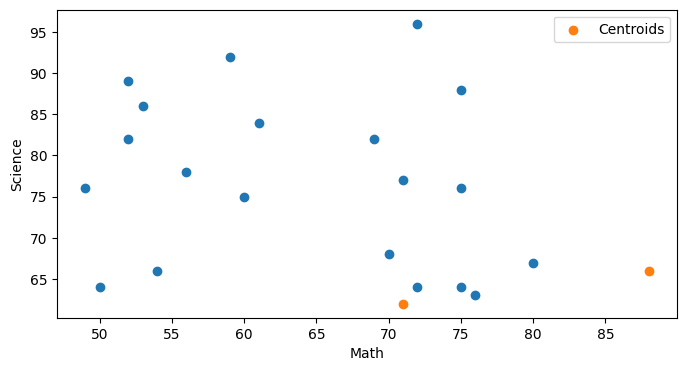

In [6]:
plt.figure(figsize=(8, 4))
plt.scatter(df["Math"], df["Science"])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [7]:
dist_c1 = np.sqrt(np.square(c1[0] - df["Math"]) + np.square(c1[1] - df["Science"]))
dist_c1

0     27.586228
1     30.000000
2     26.305893
3     14.560220
4     32.310989
5     21.095023
6     26.076810
7      5.099020
8      4.472136
9     17.464249
10     2.236068
11    15.000000
12    33.015148
13    21.931712
14    24.166092
15    17.029386
16    20.099751
17    34.014703
18    10.295630
19     6.082763
dtype: float64

In [8]:
dist_c2 = np.sqrt(np.square(c2[0] - df["Math"]) + np.square(c2[1] - df["Science"]))
dist_c2

0     39.395431
1     40.311289
2     25.553865
3     16.401219
4     38.948684
5     38.052595
6     40.261644
7     12.369317
8     13.152946
9     34.000000
10    16.124515
11    20.248457
12    42.720019
13    34.176015
14    32.449961
15    29.410882
16    24.839485
17    34.000000
18     8.062258
19    18.110770
dtype: float64

In [9]:
df["Cluster1"] = dist_c1
df["Cluster2"] = dist_c2

In [10]:
df

,STD_ID,Math,Science,Cluster1,Cluster2
0,1,52,82,27.586228,39.395431
1,2,53,86,30.000000,40.311289
2,3,75,88,26.305893,25.553865
3,4,75,76,14.560220,16.401219
4,5,59,92,32.310989,38.948684
5,6,50,64,21.095023,38.052595
6,7,49,76,26.076810,40.261644
7,8,76,63,5.099020,12.369317
8,9,75,64,4.472136,13.152946
9,10,54,66,17.464249,34.000000


In [11]:
classes = list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))

In [12]:
classes

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]

In [13]:
df["classes"] = classes

In [14]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,classes
0,1,52,82,27.586228,39.395431,0
1,2,53,86,30.000000,40.311289,0
2,3,75,88,26.305893,25.553865,1
3,4,75,76,14.560220,16.401219,0
4,5,59,92,32.310989,38.948684,0
5,6,50,64,21.095023,38.052595,0
6,7,49,76,26.076810,40.261644,0
7,8,76,63,5.099020,12.369317,0
8,9,75,64,4.472136,13.152946,0
9,10,54,66,17.464249,34.000000,0


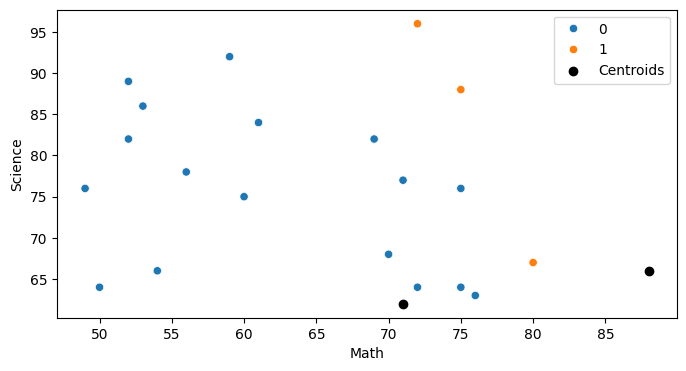

In [15]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [16]:
c1 = df[df["classes"]==0][["Math", "Science"]].mean()

In [17]:
c2 = df[df["classes"]==1][["Math", "Science"]].mean()

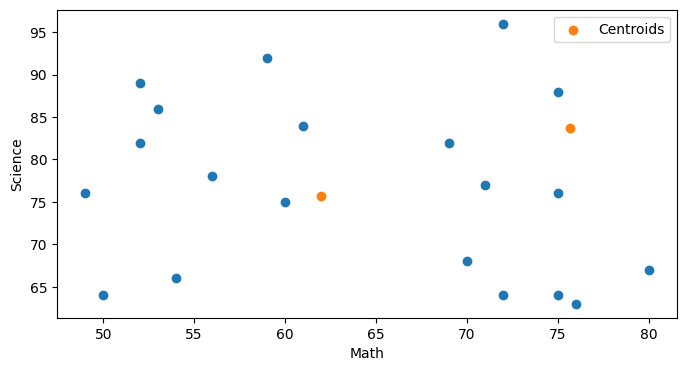

In [18]:
plt.figure(figsize=(8, 4))
plt.scatter(df["Math"], df["Science"])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [19]:
dist_c1 = np.sqrt(np.square(c1[0] - df["Math"]) + np.square(c1[1] - df["Science"]))
dist_c2 = np.sqrt(np.square(c2[0] - df["Math"]) + np.square(c2[1] - df["Science"]))

df["Cluster1"] = dist_c1
df["Cluster2"] = dist_c2

classes = list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"] = classes

In [20]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,classes
0,1,52,82,11.847357,23.725280,0
1,2,53,86,13.717995,22.786448,0
2,3,75,88,17.933074,4.384315,1
3,4,75,76,13.004790,7.695598,1
4,5,59,92,16.625844,18.633900,0
5,6,50,64,16.722858,32.335052,0
6,7,49,76,13.004790,27.746872,0
7,8,76,63,18.866587,20.669355,0
8,9,75,64,17.454340,19.677963,0
9,10,54,66,12.532587,27.956315,0


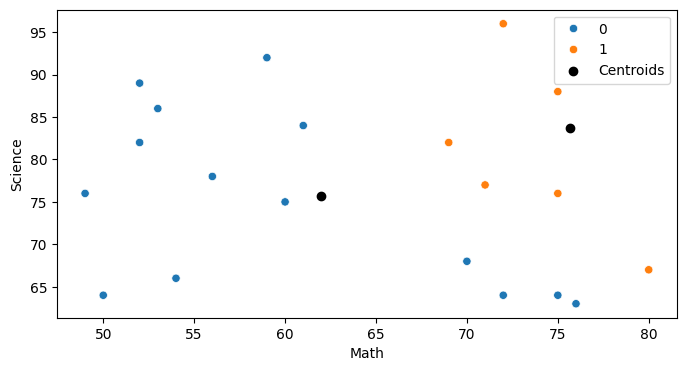

In [21]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [22]:
c1 = df[df["classes"]==0][["Math", "Science"]].mean()
c2 = df[df["classes"]==1][["Math", "Science"]].mean()

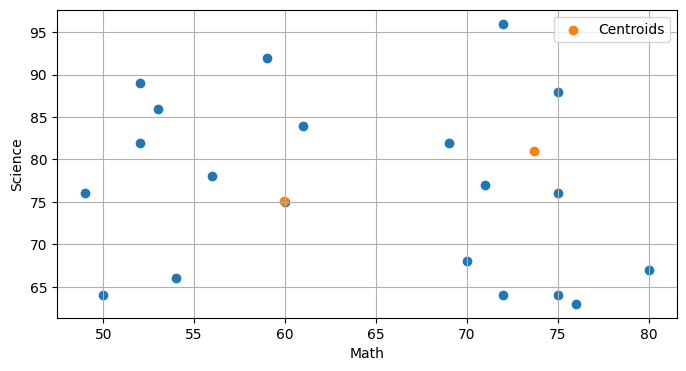

In [23]:
plt.figure(figsize=(8, 4))
plt.scatter(df["Math"], df["Science"])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [24]:
dist_c1 = np.sqrt(np.square(c1[0] - df["Math"]) + np.square(c1[1] - df["Science"]))
dist_c2 = np.sqrt(np.square(c2[0] - df["Math"]) + np.square(c2[1] - df["Science"]))

df["Cluster1"] = dist_c1
df["Cluster2"] = dist_c2

classes = list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"] = classes

In [25]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,classes
0,1,52,82,10.529356,21.689731,0
1,2,53,86,12.939814,21.262905,0
2,3,75,88,19.856886,7.125853,1
3,4,75,76,15.100007,5.174725,1
4,5,59,92,16.954019,18.333333,0
5,6,50,64,14.871216,29.139511,0
6,7,49,76,10.967950,25.168322,0
7,8,76,63,20.100005,18.150605,1
8,9,75,64,18.700922,17.052207,1
9,10,54,66,10.836917,24.734142,0


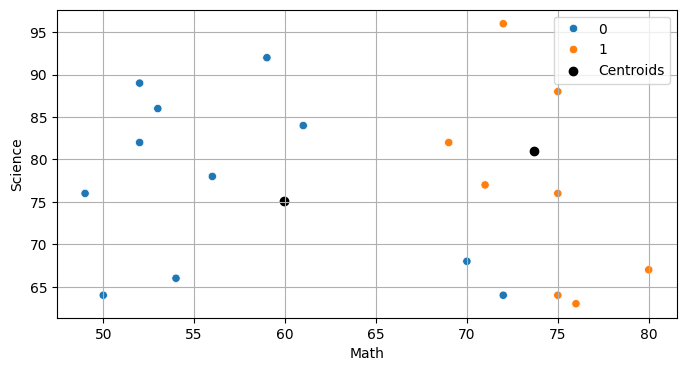

In [26]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [27]:
c1 = df[df["classes"]==0][["Math", "Science"]].mean()
c2 = df[df["classes"]==1][["Math", "Science"]].mean()

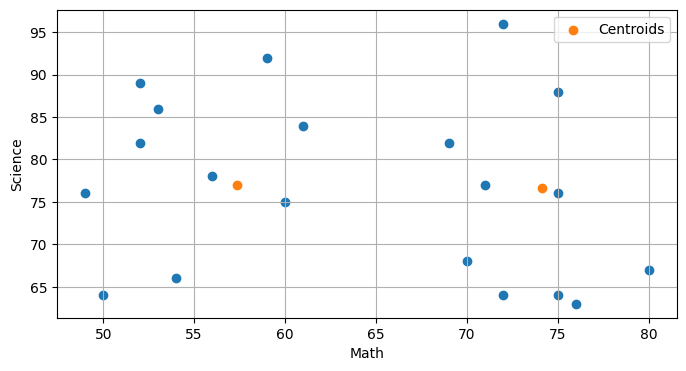

In [28]:
plt.figure(figsize=(8, 4))
plt.scatter(df["Math"], df["Science"])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [29]:
dist_c1 = np.sqrt(np.square(c1[0] - df["Math"]) + np.square(c1[1] - df["Science"]))
dist_c2 = np.sqrt(np.square(c2[0] - df["Math"]) + np.square(c2[1] - df["Science"]))

df["Cluster1"] = dist_c1
df["Cluster2"] = dist_c2

classes = list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"] = classes

In [30]:
df

,STD_ID,Math,Science,Cluster1,Cluster2,classes
0,1,52,82,7.310571,22.768536,0
1,2,53,86,9.988883,23.111821,0
2,3,75,88,20.811322,11.408604,1
3,4,75,76,17.694946,1.075291,1
4,5,59,92,15.092309,21.567481,0
5,6,50,64,14.925742,27.228776,0
6,7,49,76,8.393119,25.132772,0
7,8,76,63,23.333333,13.753409,1
8,9,75,64,21.934245,12.655285,1
9,10,54,66,11.493960,22.757554,0


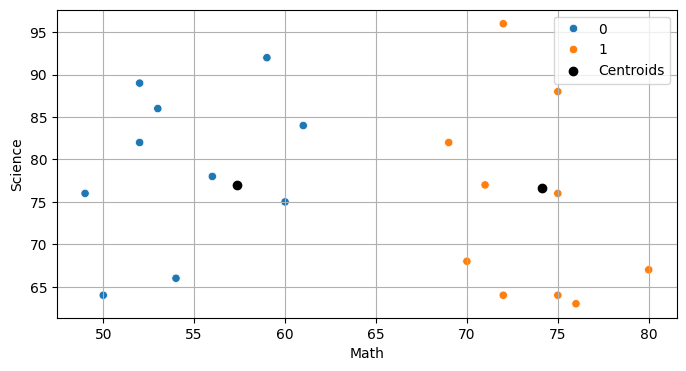

In [31]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [32]:
c1 = df[df["classes"]==0][["Math", "Science"]].mean()
c2 = df[df["classes"]==1][["Math", "Science"]].mean()

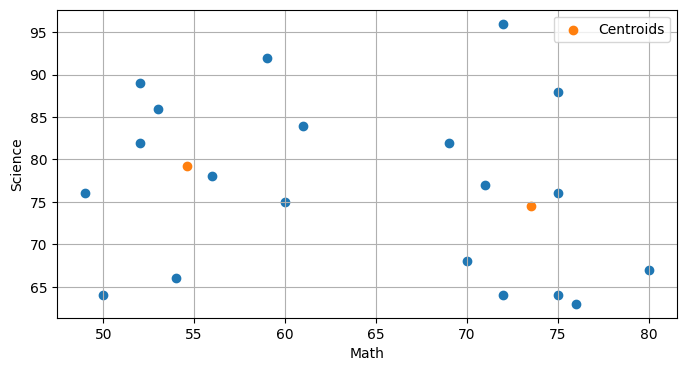

In [33]:
plt.figure(figsize=(8, 4))
plt.scatter(df["Math"], df["Science"])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

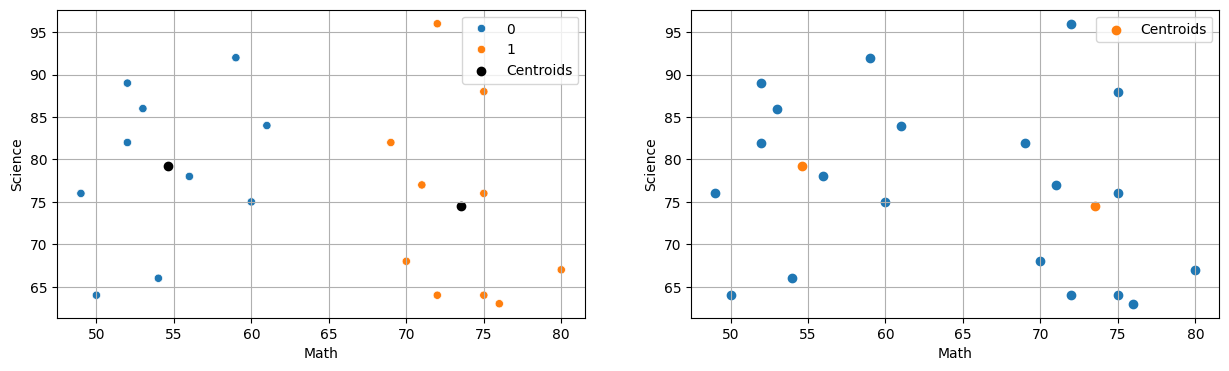

In [34]:
dist_c1 = np.sqrt(np.square(c1[0] - df["Math"]) + np.square(c1[1] - df["Science"]))
dist_c2 = np.sqrt(np.square(c2[0] - df["Math"]) + np.square(c2[1] - df["Science"]))

df["Cluster1"] = dist_c1
df["Cluster2"] = dist_c2

classes = list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"] = classes


plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")


c1 = df[df["classes"]==0][["Math", "Science"]].mean()
c2 = df[df["classes"]==1][["Math", "Science"]].mean()


plt.subplot(1, 2, 2)
plt.scatter(df["Math"], df["Science"])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

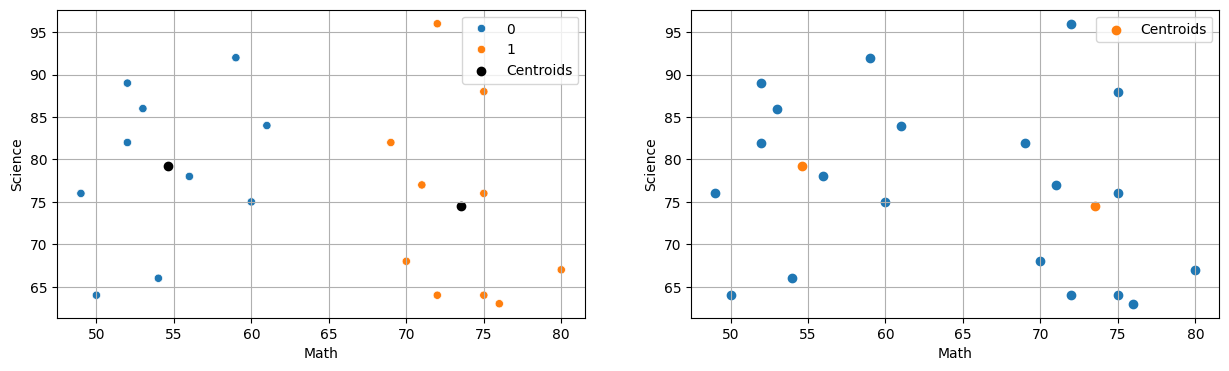

In [35]:
dist_c1 = np.sqrt(np.square(c1[0] - df["Math"]) + np.square(c1[1] - df["Science"]))
dist_c2 = np.sqrt(np.square(c2[0] - df["Math"]) + np.square(c2[1] - df["Science"]))

df["Cluster1"] = dist_c1
df["Cluster2"] = dist_c2

classes = list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"] = classes


plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")


c1 = df[df["classes"]==0][["Math", "Science"]].mean()
c2 = df[df["classes"]==1][["Math", "Science"]].mean()


plt.subplot(1, 2, 2)
plt.scatter(df["Math"], df["Science"])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

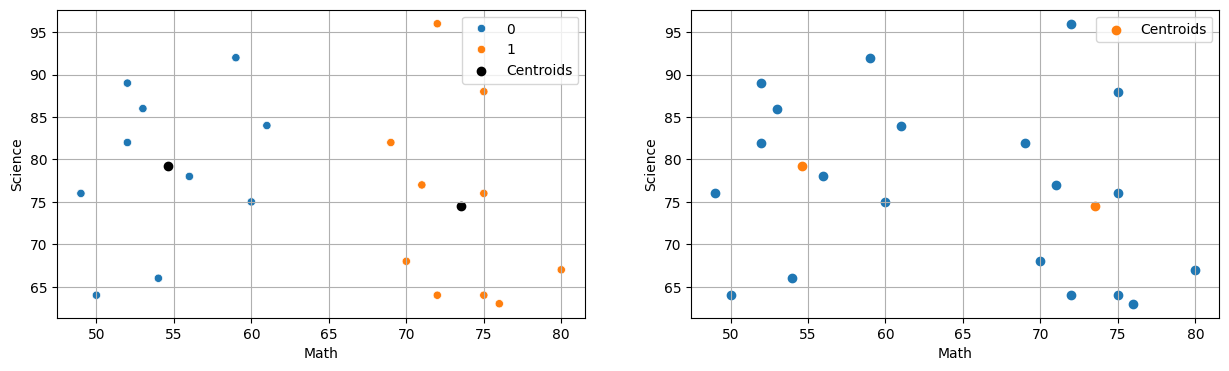

In [36]:
dist_c1 = np.sqrt(np.square(c1[0] - df["Math"]) + np.square(c1[1] - df["Science"]))
dist_c2 = np.sqrt(np.square(c2[0] - df["Math"]) + np.square(c2[1] - df["Science"]))

df["Cluster1"] = dist_c1
df["Cluster2"] = dist_c2

classes = list(map(lambda x : 0 if x[0] < x[1] else 1, zip(df["Cluster1"], df["Cluster2"])))
df["classes"] = classes


plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(df, x="Math", y="Science", hue="classes")
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids", color="black")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")


c1 = df[df["classes"]==0][["Math", "Science"]].mean()
c2 = df[df["classes"]==1][["Math", "Science"]].mean()


plt.subplot(1, 2, 2)
plt.scatter(df["Math"], df["Science"])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], label="Centroids")
plt.legend()
plt.grid()
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()